#### TODOS
- Scale distplots with log-log
- Scale scatterplots with log-log, z-score
- Pairplot
- Add new feature that is (pubs with prof) * de-weight / pubs

In [1]:
import pandas as pd

In [2]:
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation.csv', index_col = 'name', encoding = "UTF-8")

In [ ]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d publications" % (df_all[df_all['num_pubs'] < i].shape[0], i))

In [ ]:
print("Total: %d authors" % df_all.shape[0])
for i in range(1, 11):
    print("%d authors with less than %d coauthorships" % (df_all[df_all['TotalConns'] < i].shape[0], i))

In [3]:
df_trimmed = df_all[df_all['num_pubs'] >= 5]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 2]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 204479 authors


In [4]:
df_trimmed = df_trimmed[df_trimmed['max_AR'] < 1000]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 204478 authors


In [ ]:
for col in df_trimmed.columns:
    print("\nTop 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    print(df_not_null[[col]].sort_values(col, ascending = False).head(10))
    print("\nBottom 10 %s" % str(col))
    print(df_not_null[[col]].sort_values(col, ascending = True).head(10))

In [ ]:
df_trimmed.loc[['Eric S. Lander', 'Robert Langer', 'Marvin Minsky']]

In [ ]:
df_percentile = df_trimmed.copy()
for col in df_trimmed.columns:
    percentile_col = df_trimmed[pd.notna(df_trimmed[col])][col]
    df_percentile[col+'_%'] = percentile_col.rank(pct=True)
df_percentile.loc[['Eric S. Lander', 'Robert Langer', 'Marvin Minsky']][[col for col in df_percentile.columns if '%' in col]]

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[pd.notna(df_scaled[col])][[col]]
    df_scaled[col + '_Zscore'] = ss.fit_transform(scaled_col)
df_scaled.loc[['Eric S. Lander', 'Robert Langer', 'Marvin Minsky']][[col for col in df_scaled.columns if 'Zscore' in col]]

In [5]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[pd.notna(df_scaled[col])][[col]]
    df_scaled[col + '_Zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'Zscore' in col]]

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

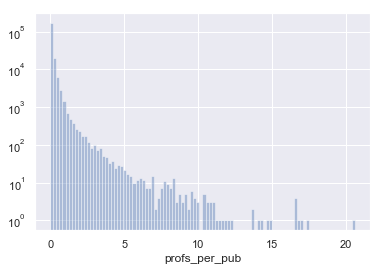

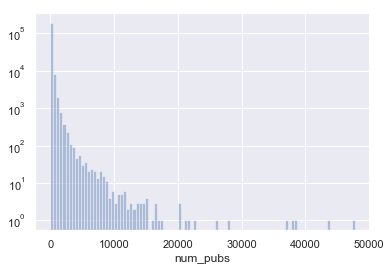

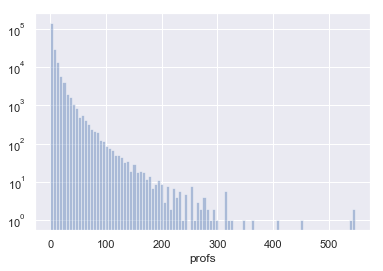

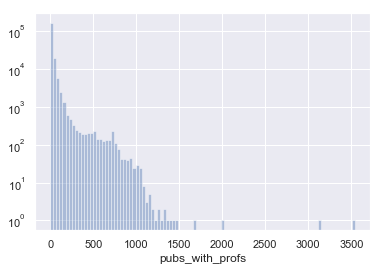

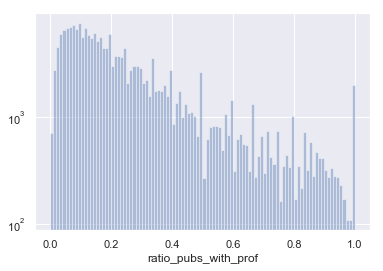

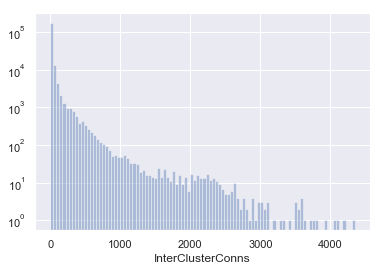

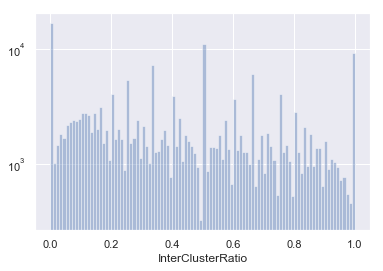

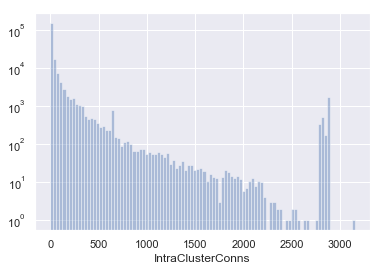

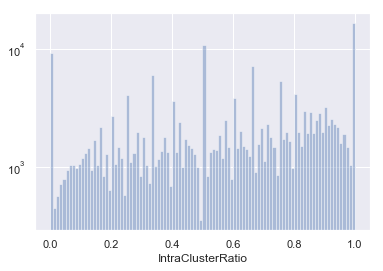

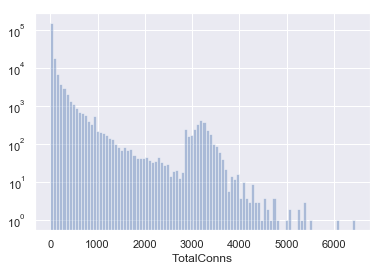

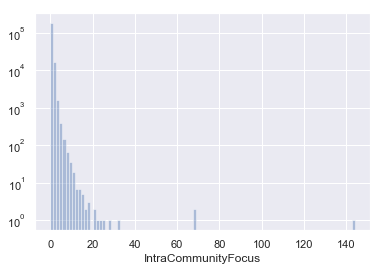

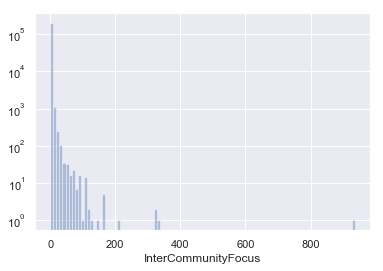

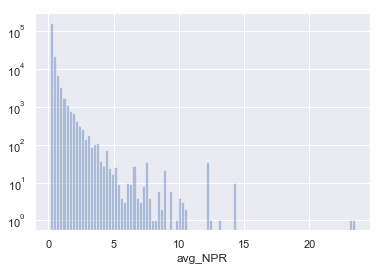

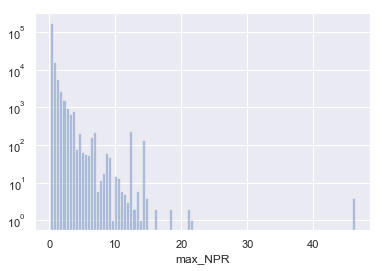

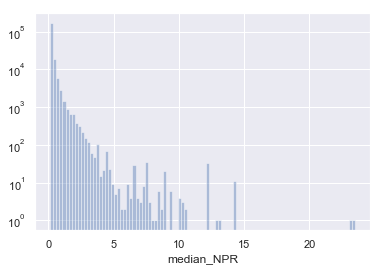

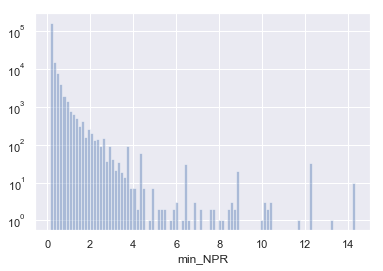

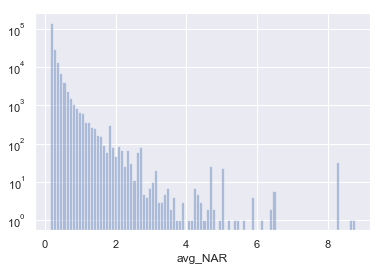

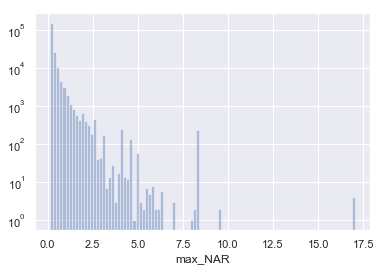

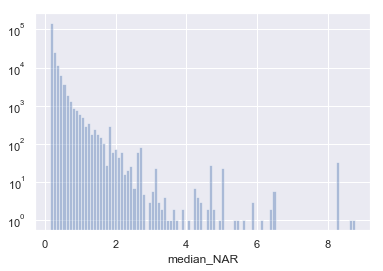

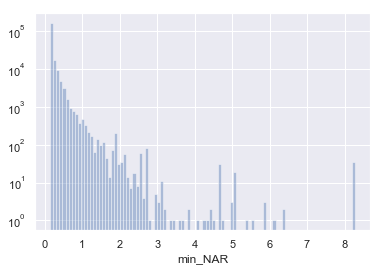

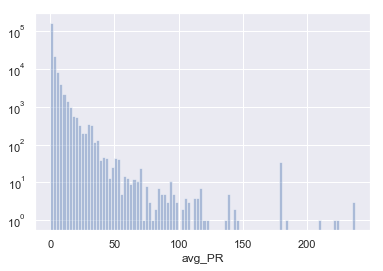

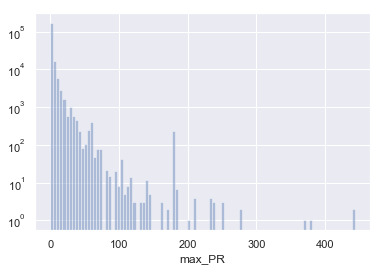

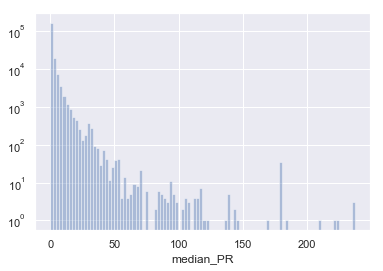

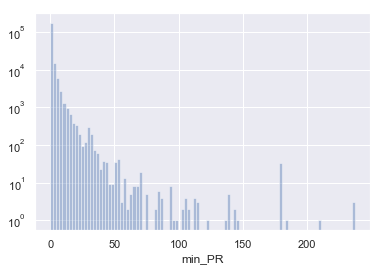

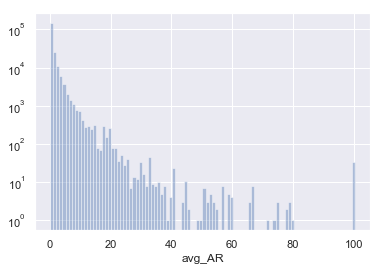

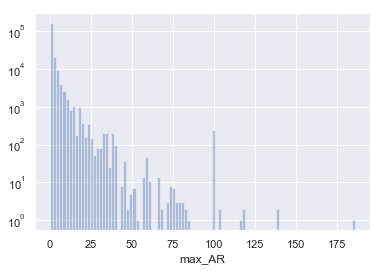

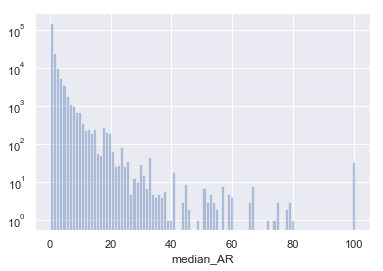

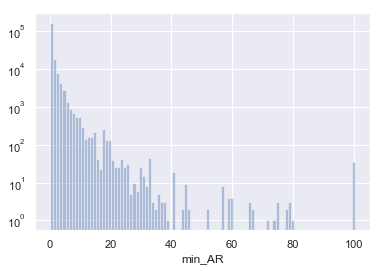

In [7]:
for col in df_trimmed.columns:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

In [ ]:
print(df_zscores.columns)

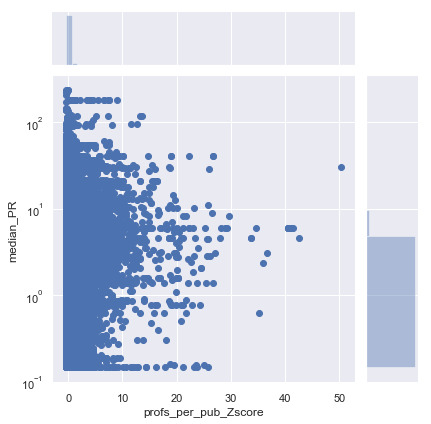

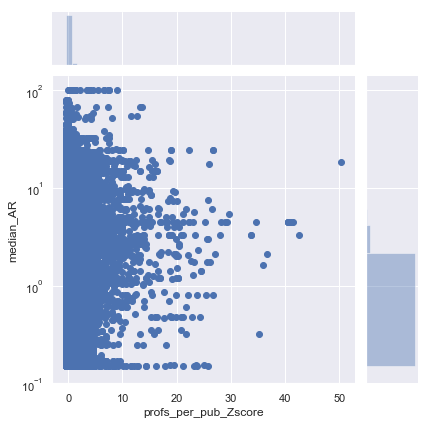

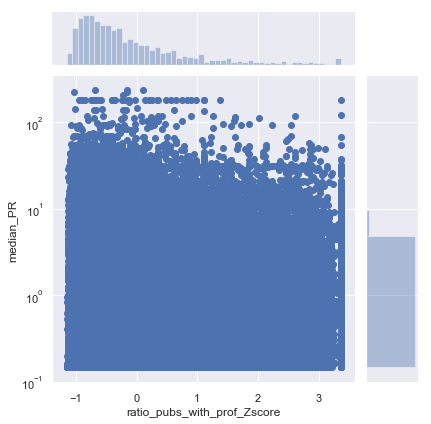

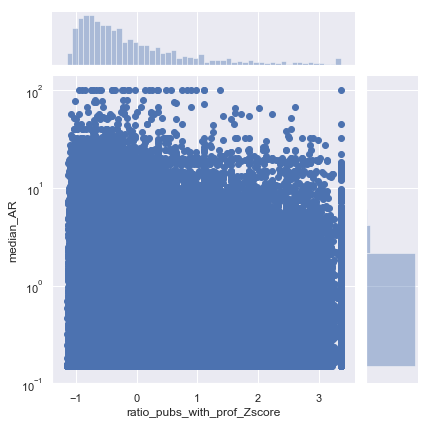

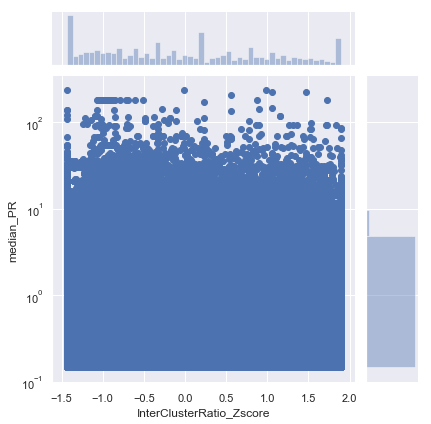

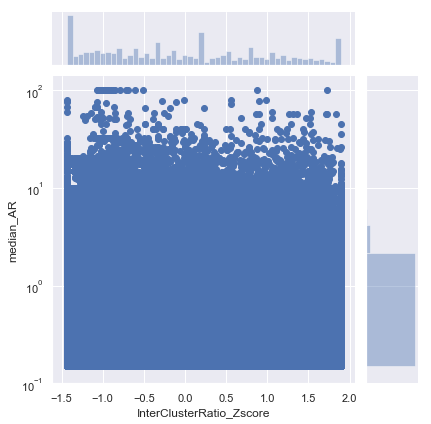

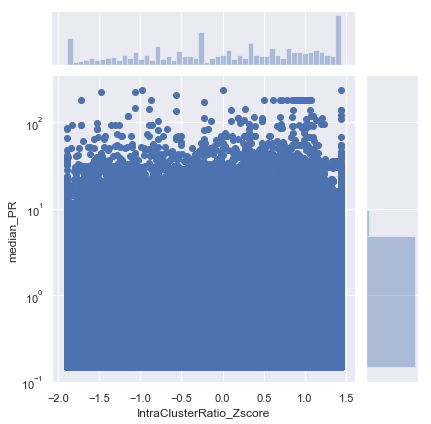

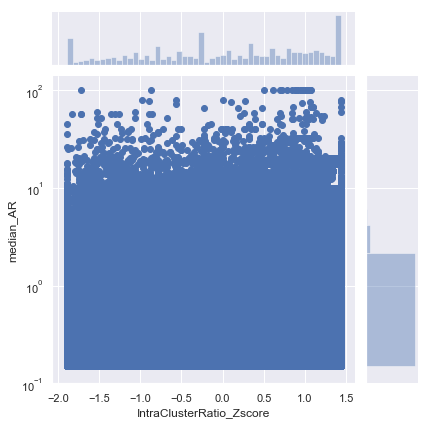

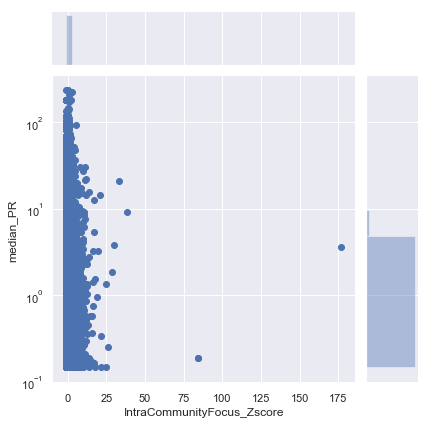

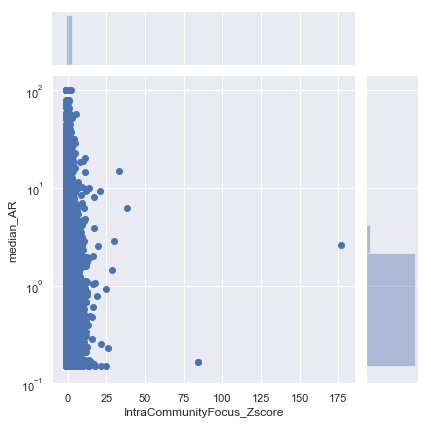

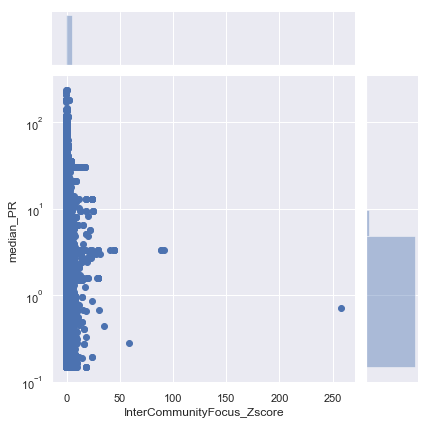

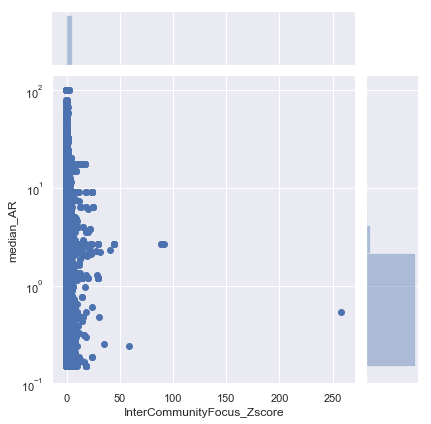

In [10]:
collab_columns = ['profs_per_pub_Zscore', 'ratio_pubs_with_prof_Zscore', 
                  'InterClusterRatio_Zscore', 'IntraClusterRatio_Zscore', 
                  'IntraCommunityFocus_Zscore','InterCommunityFocus_Zscore']
impact_columns = ['median_PR', 'median_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        g = sns.jointplot(x = x_col, y = y_col, data = pd.concat([df_zscores[[x_col]], df_trimmed[[y_col]]], axis = 1), dropna = True)
#         g.ax_marg_x.set_xscale('log')
        g.ax_marg_y.set_yscale('log')
        plt.show()

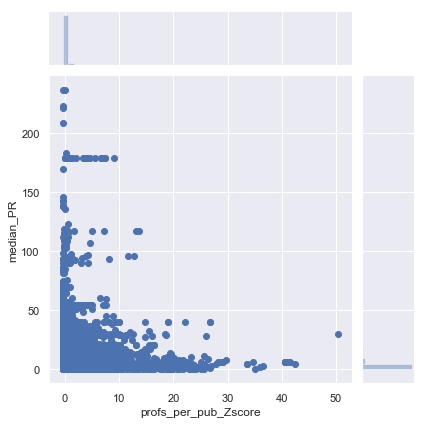

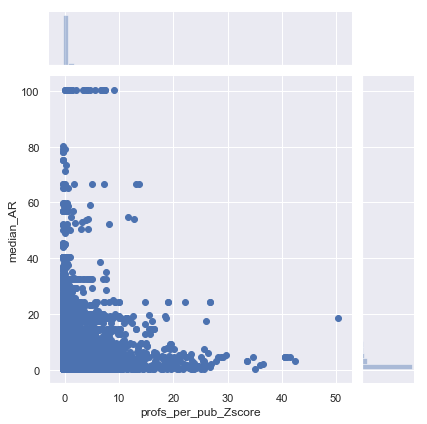

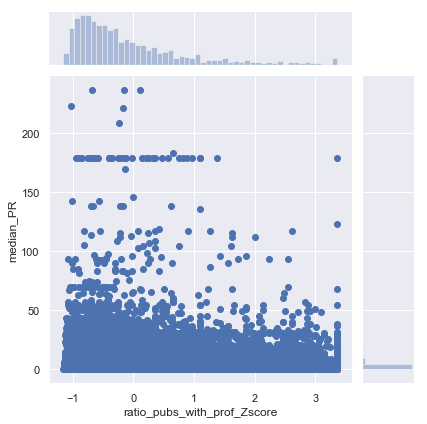

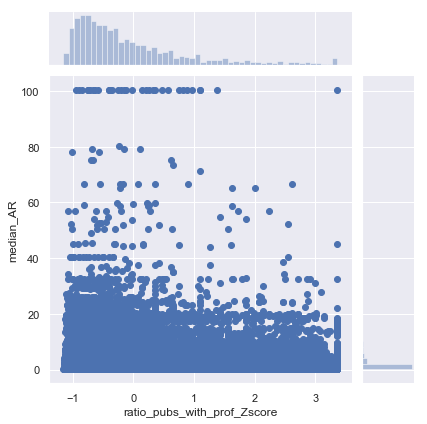

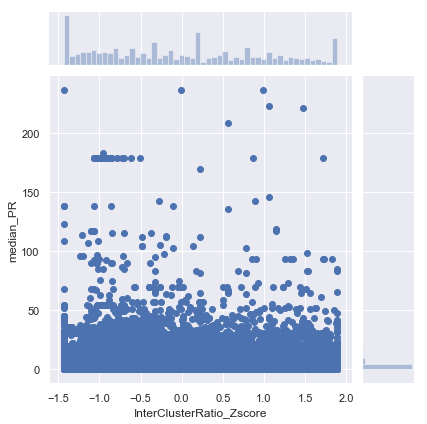

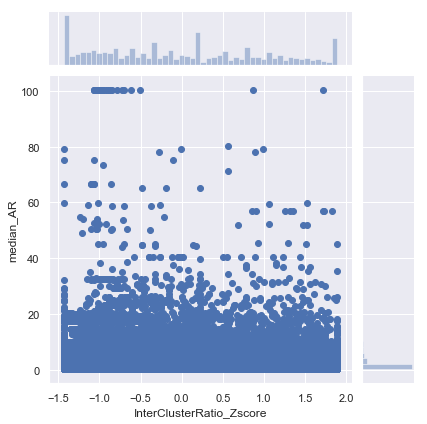

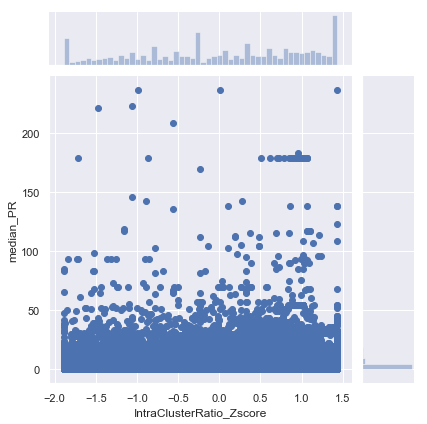

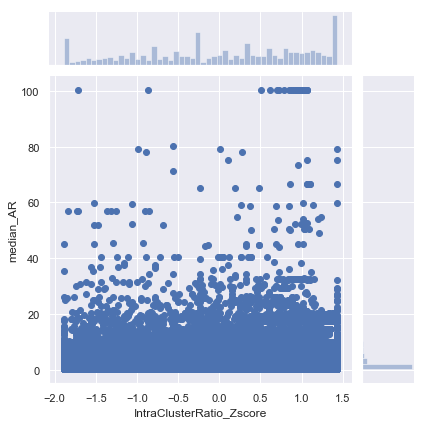

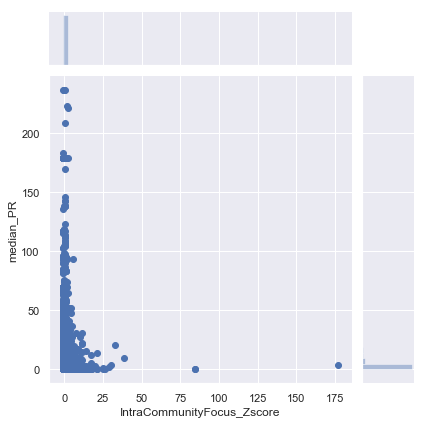

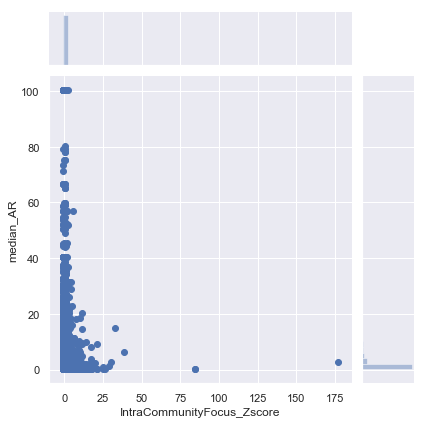

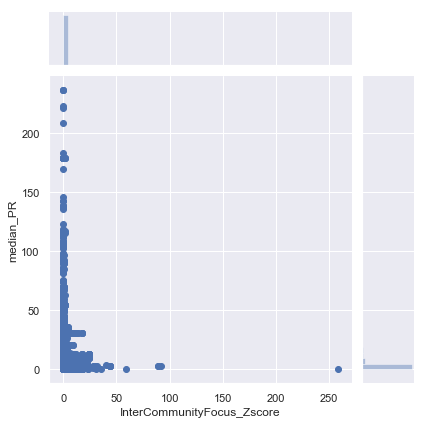

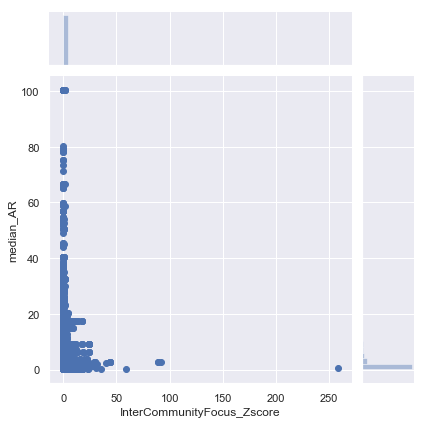

In [11]:
collab_columns = ['profs_per_pub_Zscore', 'ratio_pubs_with_prof_Zscore', 
                  'InterClusterRatio_Zscore', 'IntraClusterRatio_Zscore', 
                  'IntraCommunityFocus_Zscore','InterCommunityFocus_Zscore']
impact_columns = ['median_PR', 'median_AR']

for x_col in collab_columns:
    for y_col in impact_columns:
        g = sns.jointplot(x = x_col, y = y_col, data = pd.concat([df_zscores[[x_col]], df_trimmed[[y_col]]], axis = 1), dropna = True)
#         g.ax_marg_x.set_xscale('log')
#         g.ax_marg_y.set_yscale('log')
        plt.show()

In [ ]:
collab_columns = ['profs_per_pub_Zscore', 'ratio_pubs_with_prof_Zscore', 
                  'InterClusterRatio_Zscore', 'IntraClusterRatio_Zscore', 
                  'IntraCommunityFocus_Zscore','InterCommunityFocus_Zscore']
impact_columns = ['median_PR', 'median_AR']
df_pairplot = pd.concat([df_zscores[collab_columns], df_trimmed[impact_columns]], axis = 1)
g = sns.pairplot(df_pairplot)
plt.show()